In [ ]:
https://www.kaggle.com/rogate16/amazon-reviews-2018-full-dataset

In [91]:
import pandas as pd

df = pd.read_csv("./amazon_reviews.csv")

df.drop(df.iloc[:, 1:9], inplace = True, axis = 1)
df.drop(['userName', 'reviewTime','summary','vote'], axis = 1,inplace = True)
df.head()


,rating,reviewText
0,5.0,super smooth and yummy with crunchy bits
1,5.0,Perfect for kombucha
2,5.0,Finally a harness that fits my puppy. I really...
3,5.0,I LOVE THEM!! I bought them at Micheals our of...
4,5.0,"I love this pen! I love the shape of it, the f..."


In [92]:
import numpy as np
df_train, df_validate, df_test = np.split(df.sample(frac=1, random_state=43), 
                       [int(.6*len(df)), int(.8*len(df))])
                       
print(df.size)
print(df_train.size)
print(df_validate.size)
print(df_test.size)


1102318
661390
220464
220464


<class 'pandas.core.frame.DataFrame'>
Int64Index: 330695 entries, 139356 to 32109
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   rating      330695 non-null  float64
 1   reviewText  330443 non-null  object 
dtypes: float64(1), object(1)
memory usage: 7.6+ MB


,rating,reviewText
139356,4.0,My dog likes it
521437,5.0,Great variety
199505,5.0,Use this every day for my 12+ year old dog. H...
72805,5.0,Was definitely a win-win situation both dogs l...
308204,4.0,Love the latte one the most.


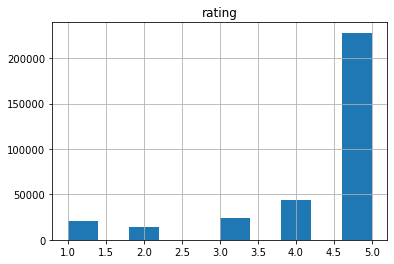

In [93]:
df_train.info()
df_train.hist()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110232 entries, 137104 to 364371
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   rating      110232 non-null  float64
 1   reviewText  110159 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


,rating,reviewText
137104,5.0,"Unfortunately, we have a cat with Asthma. Luc..."
226232,5.0,"Cleans my dog's teeth well, she doesn't love it."
534510,4.0,My oem battery died forever ago but did last n...
494316,5.0,The search is over! I finally found the PERFEC...
396460,5.0,High quality low price


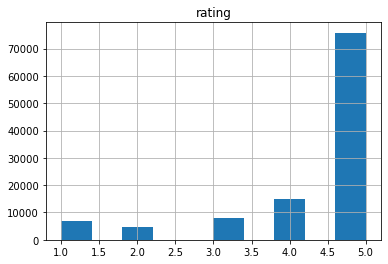

In [94]:
df_validate.info()
df_validate.hist()
df_validate.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110232 entries, 100625 to 276292
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   rating      110232 non-null  float64
 1   reviewText  110162 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


,rating,reviewText
100625,4.0,"This brand of peanuts is quite good taste, I a..."
109766,5.0,"Well made, good value"
376770,5.0,"I bought these for the candy jar at work, a ve..."
26643,3.0,This sweater has a thoughtful hole placed at t...
498368,5.0,use it to dye some shoes love it


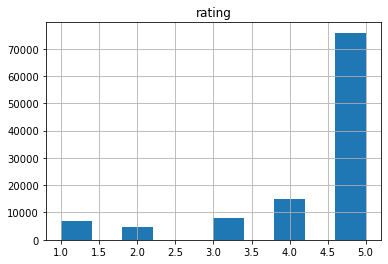

In [95]:
df_test.info()
df_test.hist()
df_test.head()

In [96]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import PorterStemmer  
from nltk.stem import WordNetLemmatizer 
from autocorrect import Speller
spell = Speller(lang='en')

stemmer = PorterStemmer()
w_n_lemmatizer = WordNetLemmatizer() 

STOPWORDS = stopwords.words("english")

def is_html_tag(word):
    w = word.replace("\n", "")
    return w.startswith("<") or w.startswith(">") or w.startswith("/") or w.strip()[:2] == "br"

def remove_html_tags(sentence):
    single_spaces = " ".join(sentence.split())

    return " ".join([token for token in single_spaces.split(" ") if not is_html_tag(token)])

def tokenize_sentence(sentence):
    return word_tokenize(sentence.lower())

def remove_stopwords(sentence):
    return " ".join([word for word in sentence.split(" ") if not word in STOPWORDS])

def remove_punctuation(tokenized_sentence):
    return [stemmer.stem(w_n_lemmatizer.lemmatize(w)) for w in tokenized_sentence if w.isalpha()]

def preprocess(sentence):
    return remove_punctuation(tokenize_sentence(remove_stopwords(remove_html_tags(str(sentence)))))

print(preprocess(df_train["reviewText"].values[1]))


['great', 'varieti']


In [97]:
print(df_train)
print(len(df_train))

        rating                                         reviewText
139356     4.0                                    My dog likes it
521437     5.0                                      Great variety
199505     5.0  Use this every day for my 12+ year old dog.  H...
72805      5.0  Was definitely a win-win situation both dogs l...
308204     4.0                       Love the latte one the most.
...        ...                                                ...
476226     5.0  Well, here's the thing. If you're opening your...
444547     4.0                       Durable and holds up nicely.
450378     3.0                                         Nice phone
244791     4.0                                          cats love
32109      5.0  Yes, I love it along with Several other of the...

[330695 rows x 2 columns]
330695


In [98]:
def sentiment(value):
    if( value<=3.0 ):
        return "negative"
    else:
        return "positive"

df_train["sentiment"] = [None] * len(df_train)
df_train["sentiment"] = df_train["rating"].apply(sentiment)
df_validate["sentiment"] = [None] * len(df_validate)
df_validate["sentiment"] = df_validate["rating"].apply(sentiment)
df_test["sentiment"] = [None] * len(df_test)
df_test["sentiment"] = df_test["rating"].apply(sentiment)

In [99]:
df_train["reviewText"] = df_train["reviewText"].apply(preprocess)
df_train.head()

,rating,reviewText,sentiment
139356,4.0,"[my, dog, like]",positive
521437,5.0,"[great, varieti]",positive
199505,5.0,"[use, everi, day, year, old, dog, he, still, a...",positive
72805,5.0,"[wa, definit, situat, dog, love, play, togeth,...",positive
308204,4.0,"[love, latt, one, most]",positive


In [100]:
def build_vocab(tokenized_input, vocab_size):
    d = dict()

    for tokens in tokenized_input:
        for token in tokens:
            # double check
            if token not in STOPWORDS and token.isalpha():
                d[token] = d.get(token, 0) + 1



    return {k for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)[:vocab_size]}

In [101]:
VOCAB_SIZE = 15000
VOCAB = build_vocab(df_train["reviewText"], VOCAB_SIZE)

In [102]:
len(VOCAB)

15000

In [103]:
def get_frequencies_for_sentiment(df):
    dict_freqs = {"positive": {}, "negative": {}}
    
    for idx in range(df.shape[0]):
        tokens = df_train.iloc[idx]["reviewText"]
        sentiment = df_train.iloc[idx]["sentiment"]
        
        for token in tokens:
            if token in VOCAB:
                dict_freqs[sentiment][token] = dict_freqs[sentiment].get(token, 0) + 1
            
    return dict_freqs

In [104]:
frequency_table = get_frequencies_for_sentiment(df_train)

In [105]:
print(frequency_table["positive"]["bad"])
print(frequency_table["negative"]["bad"])

3231
2492


In [106]:
print(frequency_table["positive"]["good"])
print(frequency_table["negative"]["good"])


50212
8135


In [107]:
print(frequency_table["positive"]["ok"])
print(frequency_table["negative"]["ok"])

2500
2268


In [108]:
print(frequency_table["positive"]["like"])
print(frequency_table["negative"]["like"])

43172
14625


In [109]:
print(frequency_table["positive"]["love"])
print(frequency_table["negative"]["love"])

62678
4150


In [110]:
print(frequency_table["positive"]["time"])
print(frequency_table["negative"]["time"])

21690
6584


In [111]:
print(frequency_table["positive"]["late"])
print(frequency_table["negative"]["late"])

491
218


In [112]:
print(frequency_table["positive"]["long"])
print(frequency_table["negative"]["long"])

8690
2267


In [113]:
print(frequency_table["positive"]["fast"])
print(frequency_table["negative"]["fast"])

5330
640


In [114]:
print(frequency_table["positive"]["great"])
print(frequency_table["negative"]["great"])

68431
4352


In [115]:
import numpy as np

def extract_features(frequency_table, tweet_tokens):
    positives = 0
    negatives = 0
    neutrals = 0

    for t in set(tweet_tokens):
        positives += frequency_table["positive"].get(t, 0)
        negatives += frequency_table["negative"].get(t, 0)
    
    return pd.Series({"positives": positives, "negatives": negatives})

In [116]:
X_train_logistic = df_train["reviewText"].apply(lambda tokens: extract_features(frequency_table, tokens))

X_train_logistic

,positives,negatives
139356,81698,26009
521437,70469,4658
199505,148429,40420
72805,164257,36758
308204,102419,16454
...,...,...
476226,182032,53163
444547,31598,4958
450378,29833,5439
244791,84871,10399


In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_logistic = scaler.fit_transform(X_train_logistic)

In [118]:
y_train_logistic = df_train["rating"].values

In [119]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0,max_iter=2000).fit(X_train_logistic, y_train_logistic)

In [120]:
from sklearn.metrics import accuracy_score

preds_train = clf.predict(X_train_logistic)

print("Train accuracy:", accuracy_score(y_train_logistic, preds_train))

Train accuracy: 0.6922965270112944


In [121]:
df_validate["reviewText"] = df_validate["reviewText"].apply(preprocess)
X_val_logistic = df_validate["reviewText"].apply(lambda tokens: extract_features(frequency_table, tokens))
X_val_logistic = scaler.transform(X_val_logistic)
y_val_logistic = df_validate["rating"].values

In [122]:
preds_val = clf.predict(X_val_logistic)

print("Validation accuracy:", accuracy_score(y_val_logistic, preds_val))

Validation accuracy: 0.6901262791204006


In [123]:
df_test["reviewText"] = df_test["reviewText"].apply(preprocess)
X_test_logistic = df_test["reviewText"].apply(lambda tokens: extract_features(frequency_table, tokens))
X_test_logistic = scaler.transform(X_test_logistic)
y_test_logistic = df_test["rating"].values

In [124]:
preds_test = clf.predict(X_test_logistic)

print("Test accuracy:", accuracy_score(y_test_logistic, preds_test))

Test accuracy: 0.690280499310545
